<a href="https://colab.research.google.com/github/Longbuivu/Artifical-Intelligence/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Bùi Vũ Long - 19146205

**Nhận dạng khuôn mặt**


In [13]:
#Các thư viện cần thiết
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
#Tạo dữ liệu
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Face/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Face/Validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 109 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [15]:
#Xử li dữ diệu
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 43808)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [17]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=20,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose=1)

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 11.7495 - accuracy: 0.4862 - val_loss: 5.6263 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 4s 1000ms/step - loss: 2.9220 - accuracy: 0.4495 - val_loss: 0.5841 - val_accuracy: 0.9333
Epoch 3/20
4/4 [==============================] - 4s 1s/step - loss: 0.3990 - accuracy: 0.9266 - val_loss: 0.1344 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 0.1891 - accuracy: 0.9633 - val_loss: 0.0743 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 4s 1s/step - loss: 0.1262 - accuracy: 0.9908 - val_loss: 0.1761 - val_accuracy: 0.9333
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 0.0912 - accuracy: 0.9541 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 0.0736 - accuracy: 0.9817 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 8/20
4/4 [===================

Sai số kiểm tra là:  0.013907686807215214
Độ chính xác kiểm tra là:  1.0


<function matplotlib.pyplot.show>

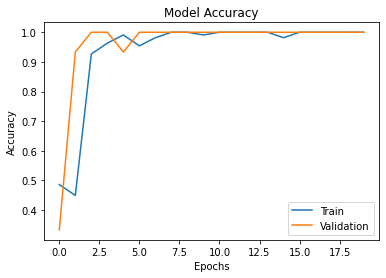

In [18]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [19]:
# Lưu mô hình
model.save('/content/drive/MyDrive/AI/Face/face.h5')

In [20]:
# Tải mô hình
model=load_model('/content/drive/MyDrive/AI/Face/face.h5')

[[1.4483760e-06 9.9995589e-01 4.2711472e-05]]
Khoi


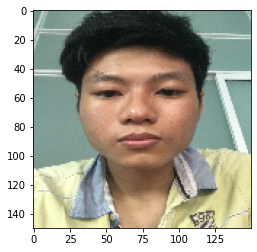

In [27]:
# Test
classes =['Ali','Khoi','Long']
img=load_img("/content/drive/MyDrive/AI/Face/Test/khoi1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Ali'
if round(result[0][1])==1:
  prediction='Khoi'
if round(result[0][2])==1:
  prediction='Long'
print(prediction)

[[8.101353e-08 4.444932e-10 9.999999e-01]]
Long


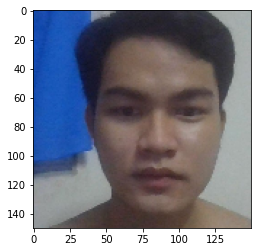

In [25]:
# Test
classes =['Ali','Khoi','Long']
img=load_img("/content/drive/MyDrive/AI/Face/Test/long1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Ali'
if round(result[0][1])==1:
  prediction='Khoi'
if round(result[0][2])==1:
  prediction='Long'
print(prediction)

[[9.9999988e-01 8.8177018e-08 1.0339726e-09]]
Ali


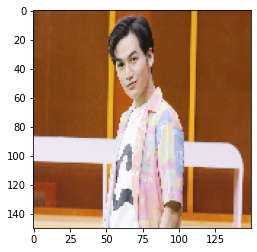

In [26]:
# Test
classes =['Ali','Khoi','Long']
img=load_img("ali.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Ali'
if round(result[0][1])==1:
  prediction='Khoi'
if round(result[0][2])==1:
  prediction='Long'
print(prediction)